# Prophet 처음 시작하기

In [2]:
import pandas as pd
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# 파이썬 버전
- sklearn과 같은 방식 지원
- Prophet 객체를 만들고 fit과 predict 함수를 지원
- 입력은 ds(datestamp)와 y 컬럼명을 반드시 사용
- ds에서 날짜로는 YYYY-MM-DD 형식을 timestamp로는 YYYY-MM-DD HH:MM:SS 사용


## 데이터
- 위키피디어 로그 데이터

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')
print(df.shape)
df.head()

(2905, 2)


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
print(df.shape)

(2905, 2)


## 모델 구성 및 학습

In [5]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
df.ds.min(), df.ds.max()

('2007-12-10', '2016-01-20')

- 예측하고 싶은 미래 날짜를 자동으로 생성
- 기간을 인자로 입력

In [7]:
# 향 후 1년 예측
future = m.make_future_dataframe(periods=365)
print(future.shape)
future.tail()

(3270, 1)


,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


- 예측은 predict 함수로 수행
- future에 있는 모든 날짜의 예측치를 추정하여 yhat 컬럼에 담는다
- 결과 forecast 객체에는 이외에도 여러가지 값들이 저장된다 (최대, 최소 범위 등)

In [8]:
forecast = m.predict(future)
print(forecast.shape)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

(3270, 19)


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206497,7.456822,8.934921
3266,2017-01-16,8.531523,7.824455,9.242823
3267,2017-01-17,8.318930,7.593062,9.038111
3268,2017-01-18,8.151543,7.420598,8.893149
3269,2017-01-19,8.163477,7.398151,8.853529


In [9]:
forecast[:2]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041239,8.200954,9.434323,8.041239,8.041239,0.802931,0.802931,0.802931,0.352295,0.352295,0.352295,0.450636,0.450636,0.450636,0.0,0.0,0.0,8.844170
1,2007-12-11,8.039695,7.940082,9.226144,8.039695,8.039695,0.553003,0.553003,0.553003,0.119639,0.119639,0.119639,0.433364,0.433364,0.433364,0.0,0.0,0.0,8.592697


### 결과 그래프
- Prophet.plot 함수 사용

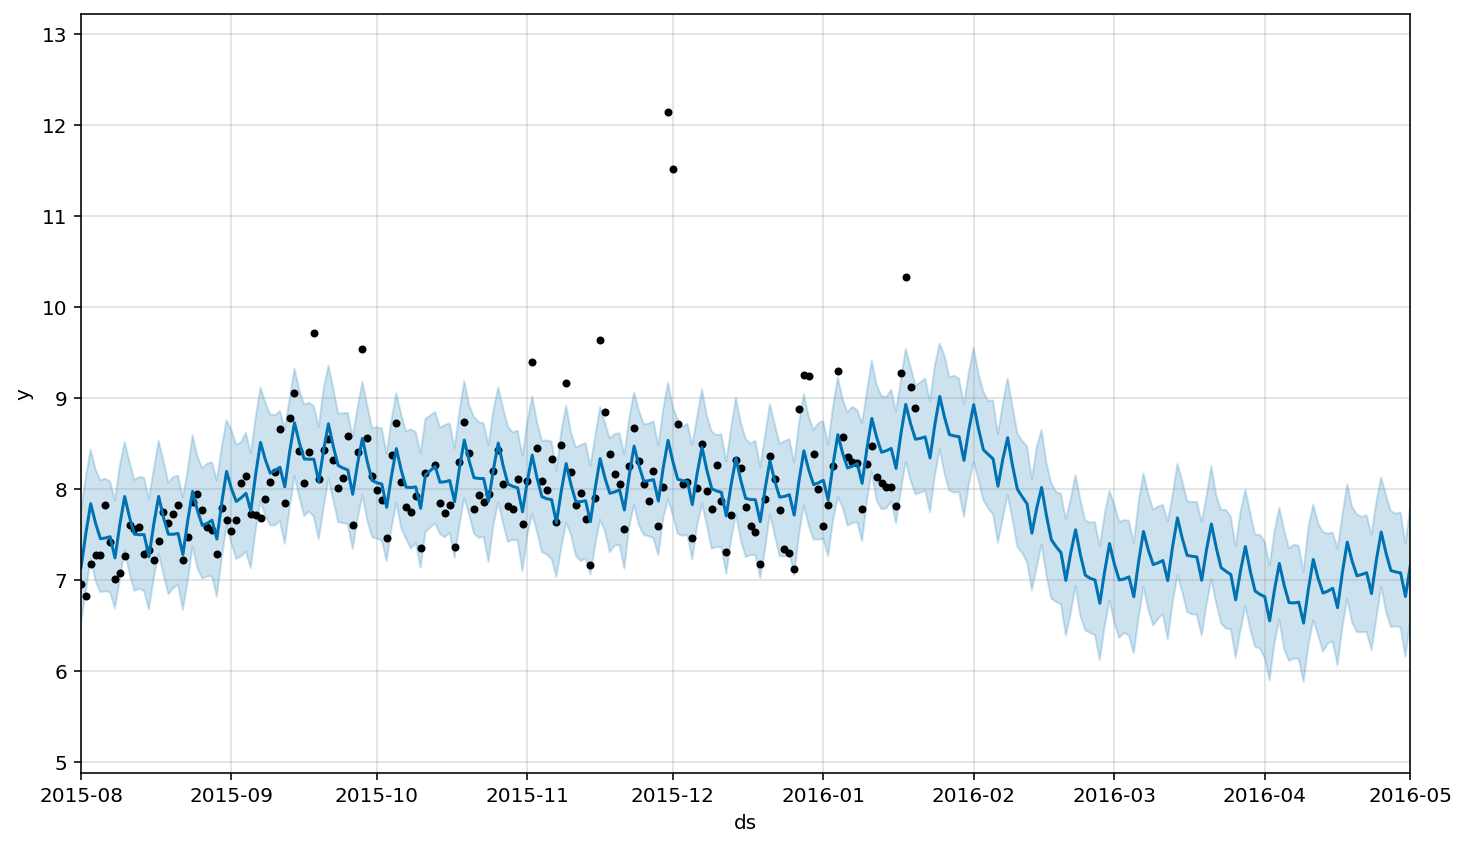

In [10]:
fig1 = m.plot(forecast)
from datetime import datetime
import matplotlib.pyplot as plt
plt.xlim([datetime(2015, 8, 1), datetime(2016, 5, 1)])
plt.show()

- 컴포넌트를 보려면 `Prophet.plot_components` 함수 사용
- 트렌드, 계절성, 휴일정보 등

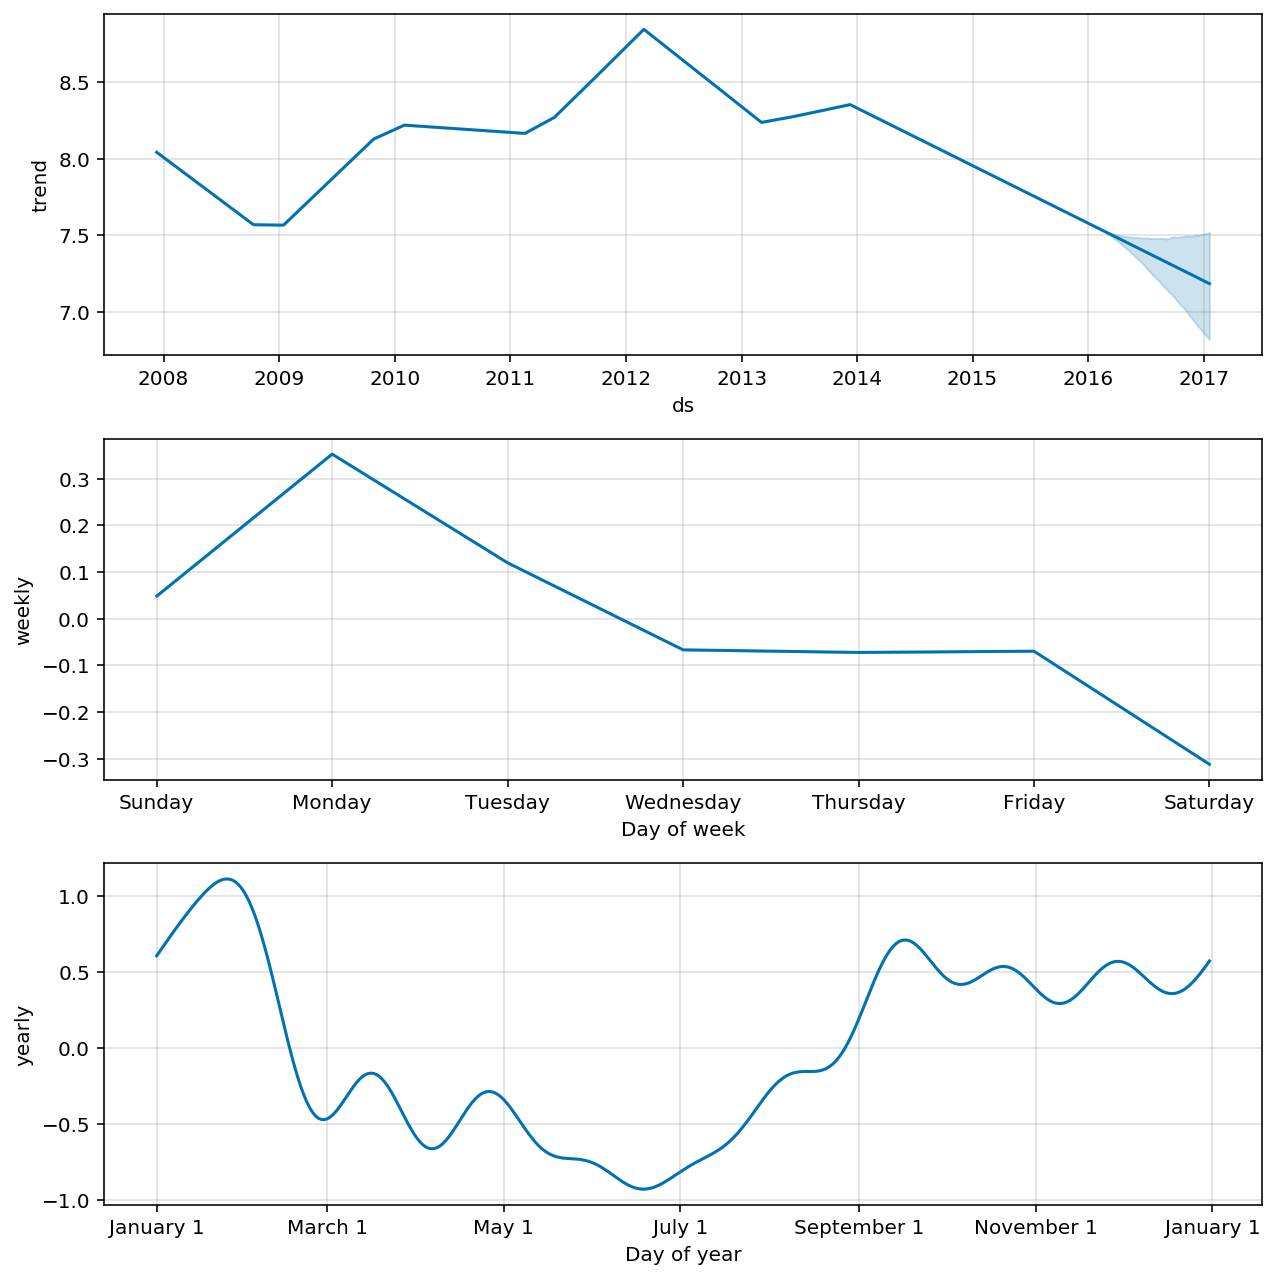

In [11]:
fig2 = m.plot_components(forecast)